# Classification - k-nearest-neighbors - Major Occupation

In [14]:
# Import feature subset with Major_Occupation Column

from sklearn import neighbors, datasets
import pandas as pd

iris = datasets.load_iris()
print(dir(iris)) # Note that it is not a dataframe, more a generalised data object
print(iris.feature_names)
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

With knn, you can determine membership probabilities for each of the 3 labels. As you can see, the predict() function just picks the most likely label.

In [15]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


In [16]:
knn.predict_proba([[3, 5, 4, 2],]) 

array([[0. , 0.8, 0.2]])

Remember: the label (0,1,2) maps to setosa, versicolor and virginica. Therefore, the probability that it is setosa, versicolor or virginica is 0, 0.8 and 0.3, respectively. Clearly versicolor is chosen!

In the next block of code, we take each pair of predictors from the four available in the Iris data set, and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file ../../pic/k_3_nearest-neighbours_Iris_SepalLengthCm_SepalWidthCm.pdf
Plotting file ../../pic/k_3_nearest-neighbours_Iris_SepalLengthCm_PetalLengthCm.pdf
Plotting file ../../pic/k_3_nearest-neighbours_Iris_SepalLengthCm_PetalWidthCm.pdf
Plotting file ../../pic/k_3_nearest-neighbours_Iris_SepalWidthCm_PetalLengthCm.pdf
Plotting file ../../pic/k_3_nearest-neighbours_Iris_SepalWidthCm_PetalWidthCm.pdf
Plotting file ../../pic/k_3_nearest-neighbours_Iris_PetalLengthCm_PetalWidthCm.pdf
Plotting file ../../pic/k_5_nearest-neighbours_Iris_SepalLengthCm_SepalWidthCm.pdf
Plotting file ../../pic/k_5_nearest-neighbours_Iris_SepalLengthCm_PetalLengthCm.pdf
Plotting file ../../pic/k_5_nearest-neighbours_Iris_SepalLengthCm_PetalWidthCm.pdf
Plotting file ../../pic/k_5_nearest-neighbours_Iris_SepalWidthCm_PetalLengthCm.pdf
Plotting file ../../pic/k_5_nearest-neighbours_Iris_SepalWidthCm_PetalWidthCm.pdf
Plotting file ../../pic/k_5_nearest-neighbours_Iris_PetalLengthCm_PetalWidthCm.pdf
Plot

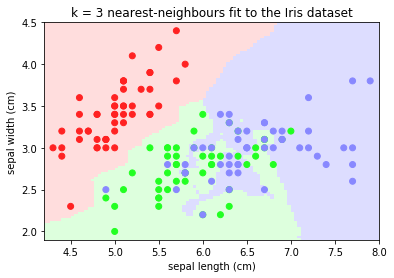

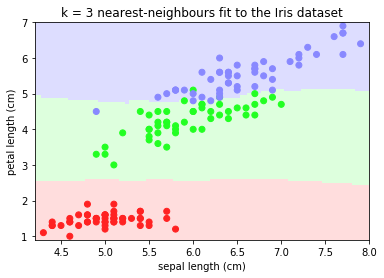

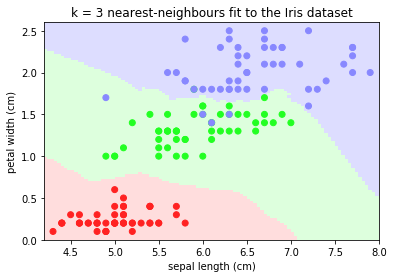

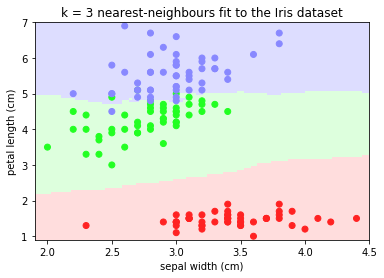

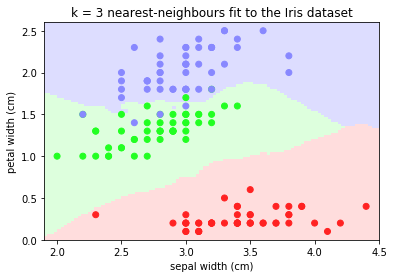

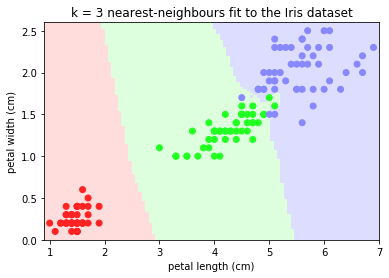

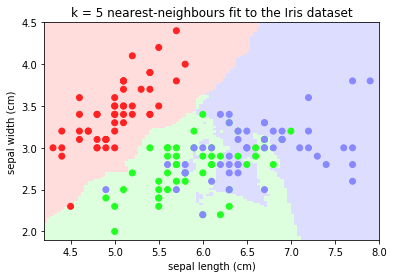

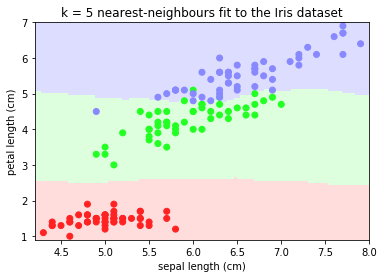

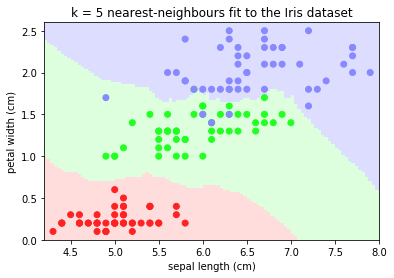

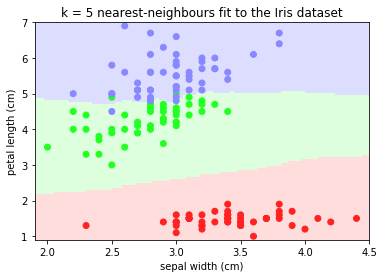

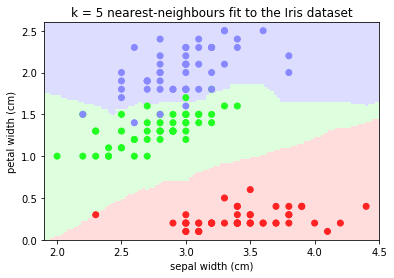

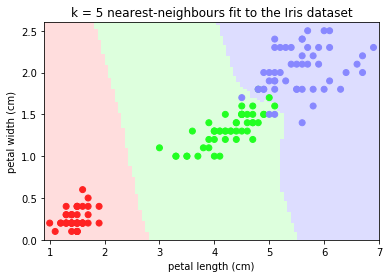

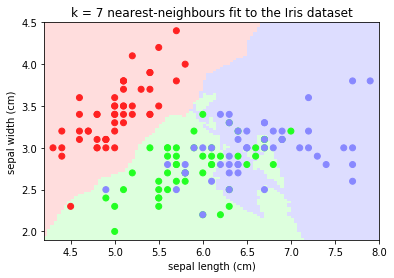

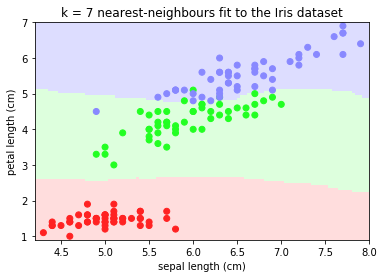

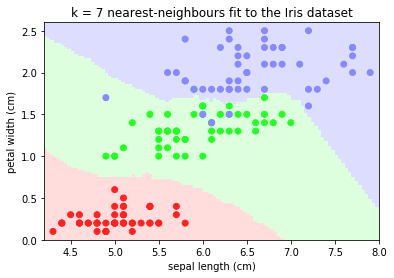

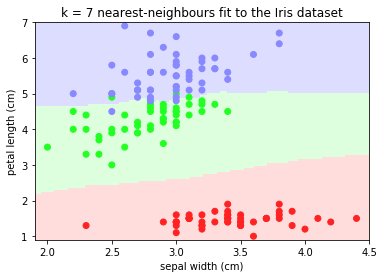

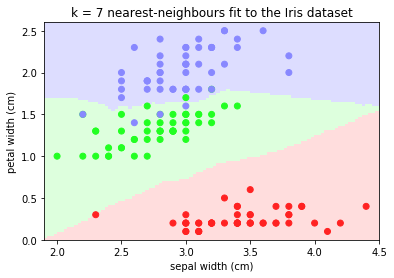

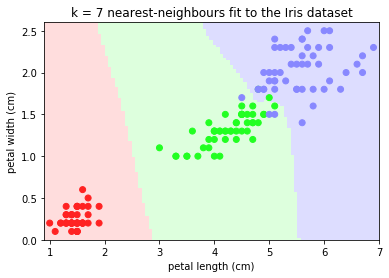

In [17]:
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
from w6support import plot_2d_class

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

#predNames = list(iris.data) # https://stackoverflow.com/a/19483025, except iris.data is an array, not a dataframe
predNames = iris.feature_names
df=pd.DataFrame(iris.data, columns=predNames)
nTrain = df.shape[0]
y = iris.target
pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Iris")
    fileTitle = "../../pic/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Iris", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)


## Model Validation

The k-nearest-neighbours classification "model" should be validated. Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training set exactly and the confusion matrix is optimal:

In [18]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print(np.all(y == y_pred1))

True


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagognal elements of the matrix:

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

1.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
             precision    recall  f1-score   support

          0      1.000     1.000     1.000        50
          1      1.000     1.000     1.000        50
          2      1.000     1.000     1.000        50

avg / total      1.000     1.000     1.000       150



All 50 training samples for each class are identified correctly, as expected when $k = 1$ (accuracy score is 1, off-diagonal terms are 0, the classification report (relative to the trsining set) is "too good to be true"...

Note:

1. The _Recall_ of the $i^{\mbox{th}}$ predictor is $R_i \equiv c_{ii} / \sum_j c_{ij}$, which is the ratio of the $i^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _column_.
2. The _Precision_ of the $j^{\mbox{th}}$ predictor is $P_j \equiv c_{jj} / \sum_i c_{ij}$, which is the ratio of the $j^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _row_.
3. $F_1$-score is defined as $F_1 = 2\frac{R_i P_i}{R_i + P_i}$.

To test how the model generalizes to the training set, we hold back some of the training data by splitting the training data into a _training set_ and a _testing set_. We hold back 20% and stratify based on the data labels $y$, so each of the row counts in the confusion matrix should be $0.2 * 50 = 10$.

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.9333333333333333
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
             precision    recall  f1-score   support

          0      1.000     1.000     1.000        10
          1      1.000     0.800     0.889        10
          2      0.833     1.000     0.909        10

avg / total      0.944     0.933     0.933        30



Note the confusion (off-diagonal nonzero elements) between Iris species 2 and species 3. For comparison, we look at the confusion matrix when $k = 3$. Firstly, we try with all the training data (not holding any observations back for a test set).

In [21]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.96
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
             precision    recall  f1-score   support

          0      1.000     1.000     1.000        50
          1      0.940     0.940     0.940        50
          2      0.940     0.940     0.940        50

avg / total      0.960     0.960     0.960       150



Note that 6 observations (3 each of species 2 and 3) are not classified the same as the human experts. However, this might also indicate something interesting about those observations. They could be outliers (not classified correctly) but, at the very least, they are extreme observations.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. Note that sampling the data like this could result in *better* relative performance, depending on what happens to the 6 problematic observations.

In [22]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.9333333333333333
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
             precision    recall  f1-score   support

          0      1.000     1.000     1.000        10
          1      1.000     0.800     0.889        10
          2      0.833     1.000     0.909        10

avg / total      0.944     0.933     0.933        30

